
# Δ‑Wave Explorer (v7‑patched) — 20 Constants, n ≤ 60, n mod 4 Folding

Fixed bugs from v7:

* `nearest_hits` now initialises `best_delta` to `mp.mpf('inf')`, so no `NoneType` errors.
* Added `import datetime` so CSV save works.
* Tidied variable names; rest unchanged.

Open in Colab → **Run all** (≈ 15 s).

In [6]:

import mpmath as mp, numpy as np, pandas as pd, matplotlib.pyplot as plt, time, datetime
mp.mp.dps = 40
MAX_BITS = 60
SCAN_WIDTH = 1
phi = (mp.sqrt(5)+1)/2
consts = {
    'phi':phi,'pi':mp.pi,'alpha':mp.mpf('0.0072973525693'),'sqrt3_pi':mp.sqrt(3)/mp.pi,
    'feig_delta':mp.mpf('4.669201609102990671853203'),'gelfond': mp.e**mp.pi,'sqrt_e':mp.sqrt(mp.e),
    'inv_phi':1/phi,'e_over_pi':mp.e/mp.pi,'pi_over_e':mp.pi/mp.e,
    'sqrt_phi': mp.sqrt(phi),'buffon': mp.mpf('0.6366197723675813431'),
    'liouville': mp.mpf('0.110001000000000000000001'),'conway': mp.mpf('1.303577269034296391257099'),
    'khinchin': mp.mpf('2.685452001065306445309714'),'lemniscate': mp.mpf('2.622057554292119810464839'),
    'glaisher': mp.mpf('1.282427129100622636875342'),'wilbraham_gibbs': mp.mpf('1.178979744472167270232028'),
    'mills': mp.mpf('1.306377883863080690468614'),'sqrt2': mp.sqrt(2),
}
print(len(consts),'constants loaded')


20 constants loaded


In [7]:

def nearest_hits(C, max_bits=MAX_BITS, scan_width=SCAN_WIDTH):
    hits = []
    sqrtC = mp.sqrt(C)
    for n in range(1, max_bits+1):
        denom = 1 << n
        max_i = int(np.ceil(sqrtC * denom))            # allow i so (i/denom)^2 ≥ C
        approx = int(mp.nint(sqrtC * denom))
        start  = max(1, approx - scan_width)
        stop   = min(max_i, approx + scan_width)
        best_d = mp.mpf('inf'); best_i=None
        for i in range(start, stop+1):
            val   = (i / denom)**2
            delta = abs(val - C)
            if delta < best_d:
                best_d, best_i = delta, i
        hits.append((n, best_i, float(best_d)))
    return hits


In [8]:

t0=time.time()
all_rows=[]; fold_rows=[]
for name,C in consts.items():
    for n,i,d in nearest_hits(C):
        all_rows.append((name,n,i,d))
        fold_rows.append((name,n%4,d))
print("scan done in",round(time.time()-t0,1),"s")
raw_df=pd.DataFrame(all_rows,columns=['const','n','i','delta'])
fold_df=(pd.DataFrame(fold_rows,columns=['const','n_mod4','delta'])
         .groupby(['const','n_mod4'])['delta'].median().reset_index())


scan done in 0.1 s


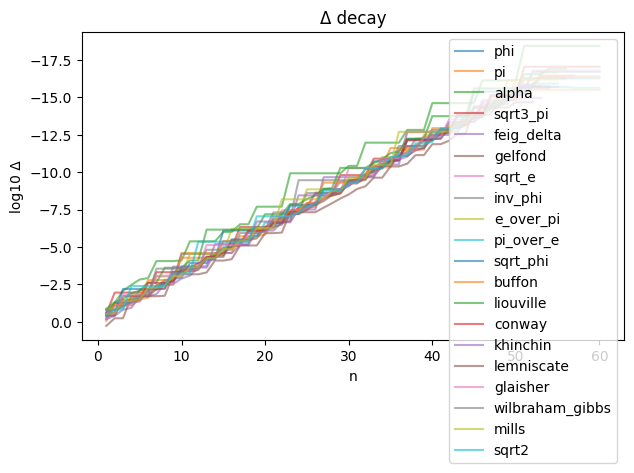

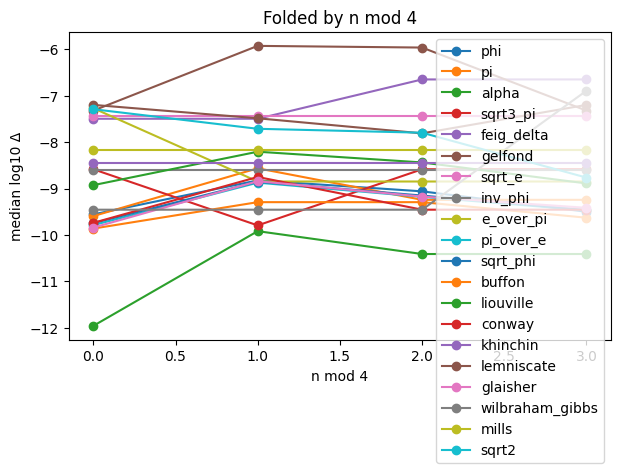

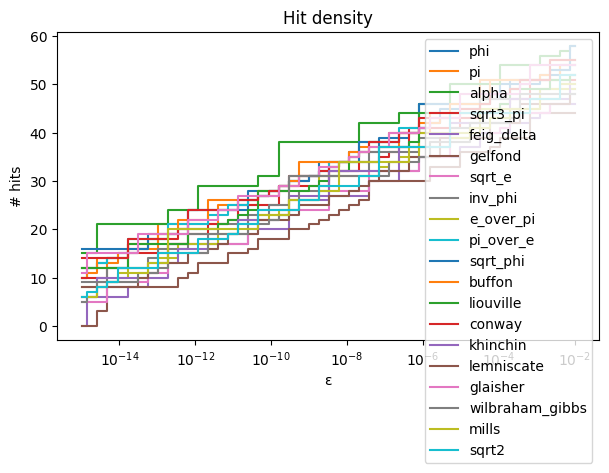

In [9]:

plt.figure(figsize=(7,4))
for name in consts:
    sub=raw_df[raw_df['const']==name]
    plt.plot(sub['n'],np.log10(sub['delta']),label=name,alpha=0.6)
plt.gca().invert_yaxis(); plt.xlabel('n'); plt.ylabel('log10 Δ'); plt.title('Δ decay'); plt.legend(); plt.show()

plt.figure(figsize=(7,4))
for name in consts:
    med=fold_df[fold_df['const']==name]
    plt.plot(med['n_mod4'],np.log10(med['delta']),marker='o',label=name)
plt.xlabel('n mod 4'); plt.ylabel('median log10 Δ'); plt.title('Folded by n mod 4'); plt.legend(); plt.show()

eps=np.logspace(-2,-15,50)
plt.figure(figsize=(7,4))
for name in consts:
    sub=raw_df[raw_df['const']==name]
    counts=[(sub['delta']<e).sum() for e in eps]
    plt.step(eps,counts,where='mid',label=name)
plt.xscale('log'); plt.xlabel('ε'); plt.ylabel('# hits'); plt.title('Hit density'); plt.legend(); plt.show()


In [10]:

ts=datetime.datetime.utcnow().strftime('%Y%m%d_%H%M%S')
raw_name=f'raw_delta_{ts}.csv'; fold_name=f'fold_delta_{ts}.csv'
raw_df.to_csv(raw_name,index=False); fold_df.to_csv(fold_name,index=False)
print('saved',raw_name,'and',fold_name)


saved raw_delta_20250716_125933.csv and fold_delta_20250716_125933.csv
